In [94]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the absolute path to the parent directory
current_dir = os.path.dirname(os.path.abspath('.'))
sys.path.append(current_dir)

# Try importing with absolute path
from functions.volatility_functions import calculate_ewma_volatility, add_volatility_bands, plot_price_and_volatility

In [95]:
# read data
raw_ohlcv = pd.read_csv('../data/binance_data/btcusdt_ohlcv_2h.csv', parse_dates=['Date'], index_col='Date')

In [96]:
volatility = calculate_ewma_volatility(
    data=raw_ohlcv,
    timeframe='2h',
    decay_factor=0.93,  # Custom decay
    min_periods=30)

In [97]:
vol_analysis = add_volatility_bands(
    volatility=volatility,
    num_stdev=1.5,
    window=30)

In [98]:
vol_analysis

,volatility,volatility_regime,vol_upper_band,vol_lower_band,vol_mean
Date,,,,,
2019-09-08 16:00:00,NaN,NaN,NaN,NaN,NaN
2019-09-08 18:00:00,NaN,NaN,NaN,NaN,NaN
2019-09-08 20:00:00,NaN,NaN,NaN,NaN,NaN
2019-09-08 22:00:00,NaN,NaN,NaN,NaN,NaN
2019-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-10-14 04:00:00,47.228394,high,43.098056,28.803824,35.950940
2024-10-14 06:00:00,48.709828,high,43.432650,28.990770,36.211710
2024-10-14 08:00:00,47.688964,high,43.707093,29.202927,36.455010


/Users/martin/Documents/GitHub/simple_candlestick_strats/functions/volatility_functions.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


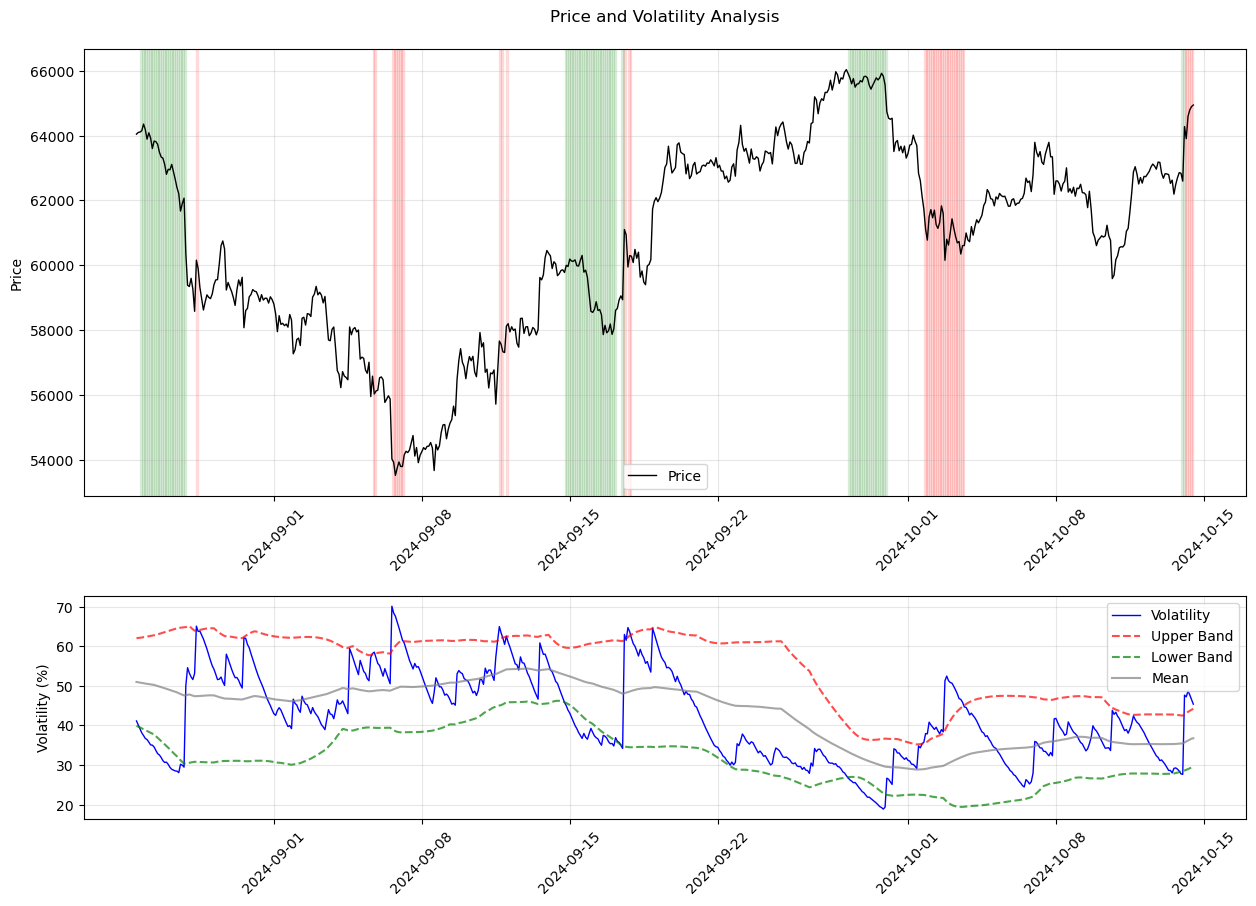

In [99]:
fig = plot_price_and_volatility(raw_ohlcv, vol_analysis, window_days=50)
plt.show()